# Visualización

TODO:

* Histograma stacked por número de vícitimas y número de asesinos.
* Resaltar con anotaciones casos importantes
* Mapa con los países. 
* Bubble Clouds con tipo de motivación y país. 
* Diferencia entre las víctimas probadas y probables. lolly pop chart


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
colores = ["#000000", "#3D0000","#950101"," #FF0000", "#6E1722"]
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.family"] = "Fira Sans Extra Condensed"

In [102]:
last_kills = pd.DataFrame(data={'año_inicio':[2020] ,'proven_victims':[7]})
last_kills

,año_inicio,proven_victims
0,2020,7


In [112]:
serial_killers = pd.read_excel("output/serial_killers.xlsx")
serial_killers = serial_killers.append(last_kills, ignore_index=True)
serial_killers = serial_killers[serial_killers.año_inicio >= 1900]

serial_killers['año'] = pd.to_datetime(serial_killers.año_inicio.map(str) + '-01-01')
serial_killers.columns

Index(['Name', 'pais_1', 'pais_2', 'pais_3', 'año_inicio', 'año_termino',
       'proven_victims', 'possible_victims', 'Notes', 'tipo_asesino',
       'identificado', 'views', 'año'],
      dtype='object')

In [113]:
ts = serial_killers[['año','proven_victims']].groupby('año').sum()
ts

,proven_victims
año,
1900-01-01,55
1905-01-01,10
1906-01-01,36
1907-01-01,33
1908-01-01,12
...,...
2011-01-01,71
2014-01-01,10
2015-01-01,9


# Gráfico línea de tiempo con cantidad de víctimas

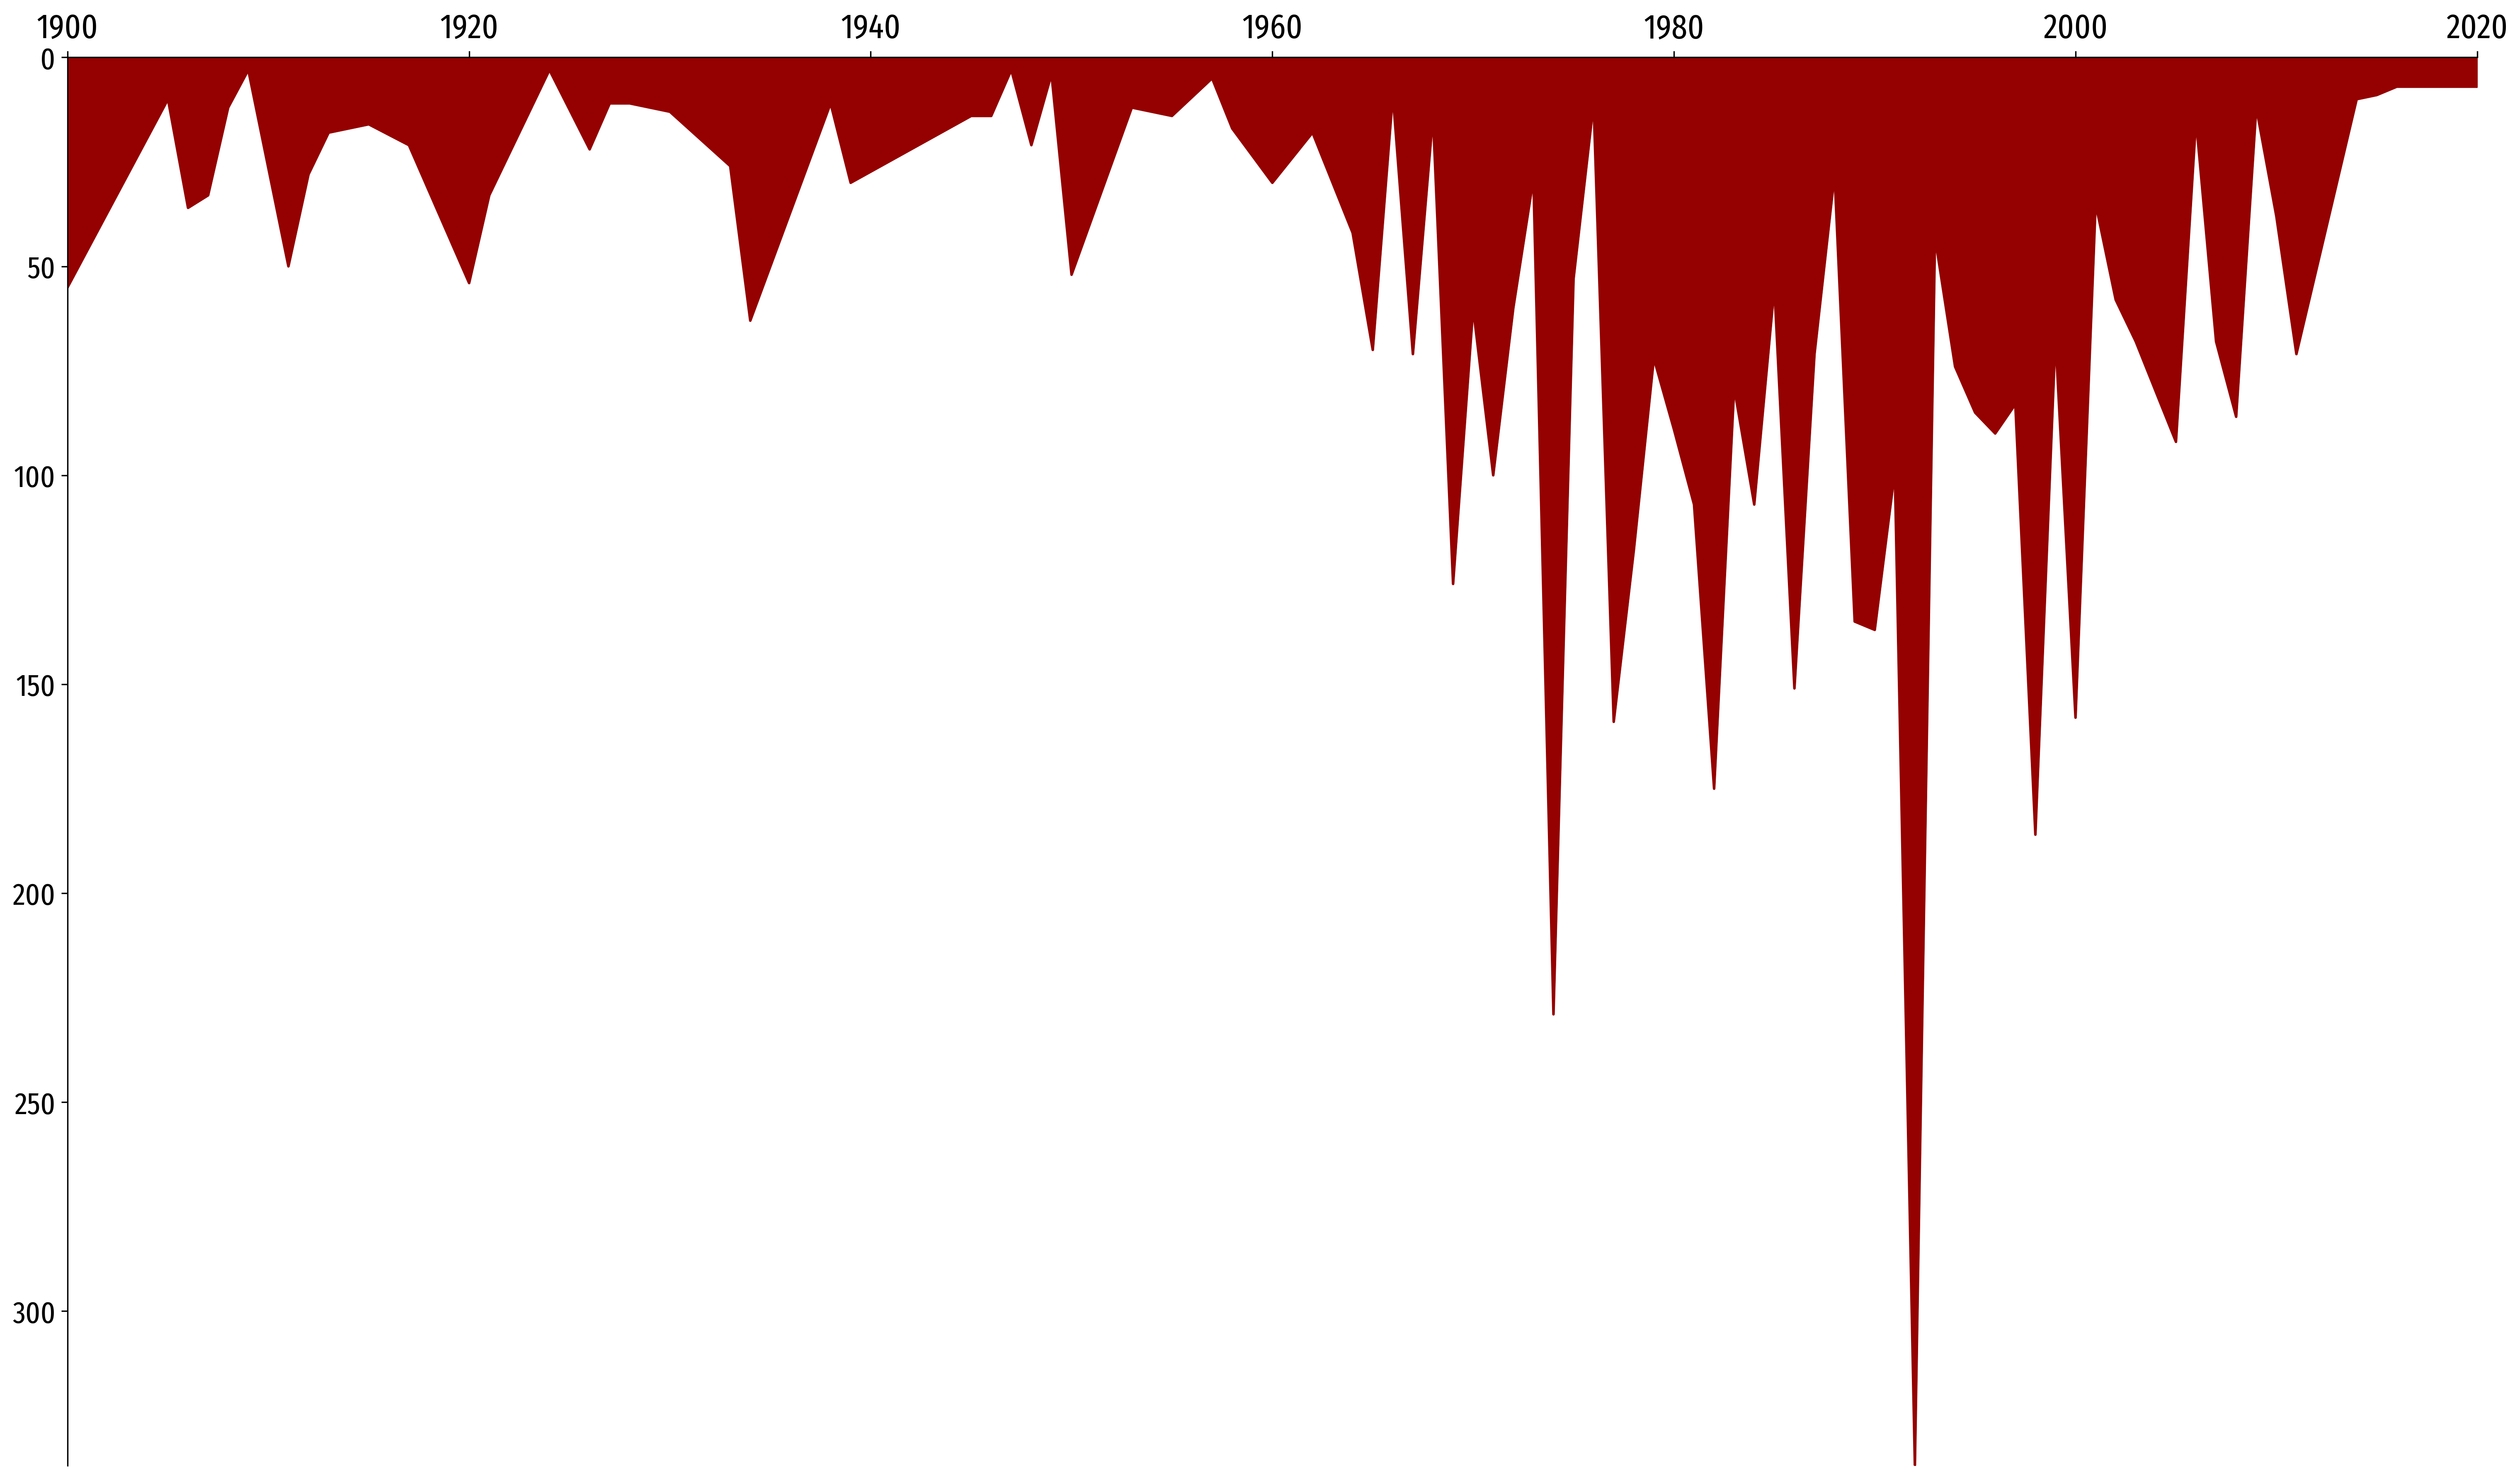

In [118]:
fig = plt.figure(figsize=(25,15), dpi = 300)
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('top')
ax.invert_yaxis()
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=18)
ax.margins(0)
plt.xlim(pd.to_datetime('1900-01-01'),pd.to_datetime( '2020-01-01'))
ax.plot(ts.index, ts.proven_victims, linewidth = 1.5, color ='#950000' )
plt.fill_between(ts.index, ts.proven_victims, color = '#950000')#
#plt.savefig('output/vis/hist.svg', transparent=True)

# Gráfico mapa con n° de asesinos en serie